# Multiple Linear Regression & Regularization

## Intro 

In this analysis we want to analyze the factors which influence the house price and  build a linear regression model to predict the house price.
The dataset we choose is from kaggle:https://www.kaggle.com/c/house-prices-advanced-regression-techniques

- Data cleaning & Explainatory Data Analysis
- Multiple Linear Regression Modeling
    - Scikit Learn
    - OLS Mode
- Model Assessment
    - Cross Validation
    - Model Performance:R-squared,RMSE
    - Model Assumptions:
        - Linearity of residuals
        - Aucolinearity
        - Normaility of residuals
        - Multilinearity
        - Leverage
- Reassesing after remove outliers(Z-Score) 
- Regularzation
    - Ridge Regression        
    - Lasso Regression
    - K-Fold Validation
              


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [151]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

### 1. Data Cleaning and Expanatory Analysis

In [168]:
house = pd.read_csv('housePrice/train.csv')

In [169]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [170]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [171]:
house.isnull().sum().sort_values()[-1:-21:-1]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

First let's remove columns with a large number of NA values. I'll set 259/1460 = 17.8% which is the deleting threshold in here. 81/1640 = 5% missing of the total number of records of missing is acceptable.

In [172]:
garage_null = house[['GarageCond','GarageYrBlt','GarageFinish','GarageQual']]
drop_column = house.isnull().sum()[house.isnull().sum().values>258].index
house = house.drop(garage_null[garage_null['GarageCond'].isnull()].index,axis=0)
house = house.drop(drop_column,axis=1)

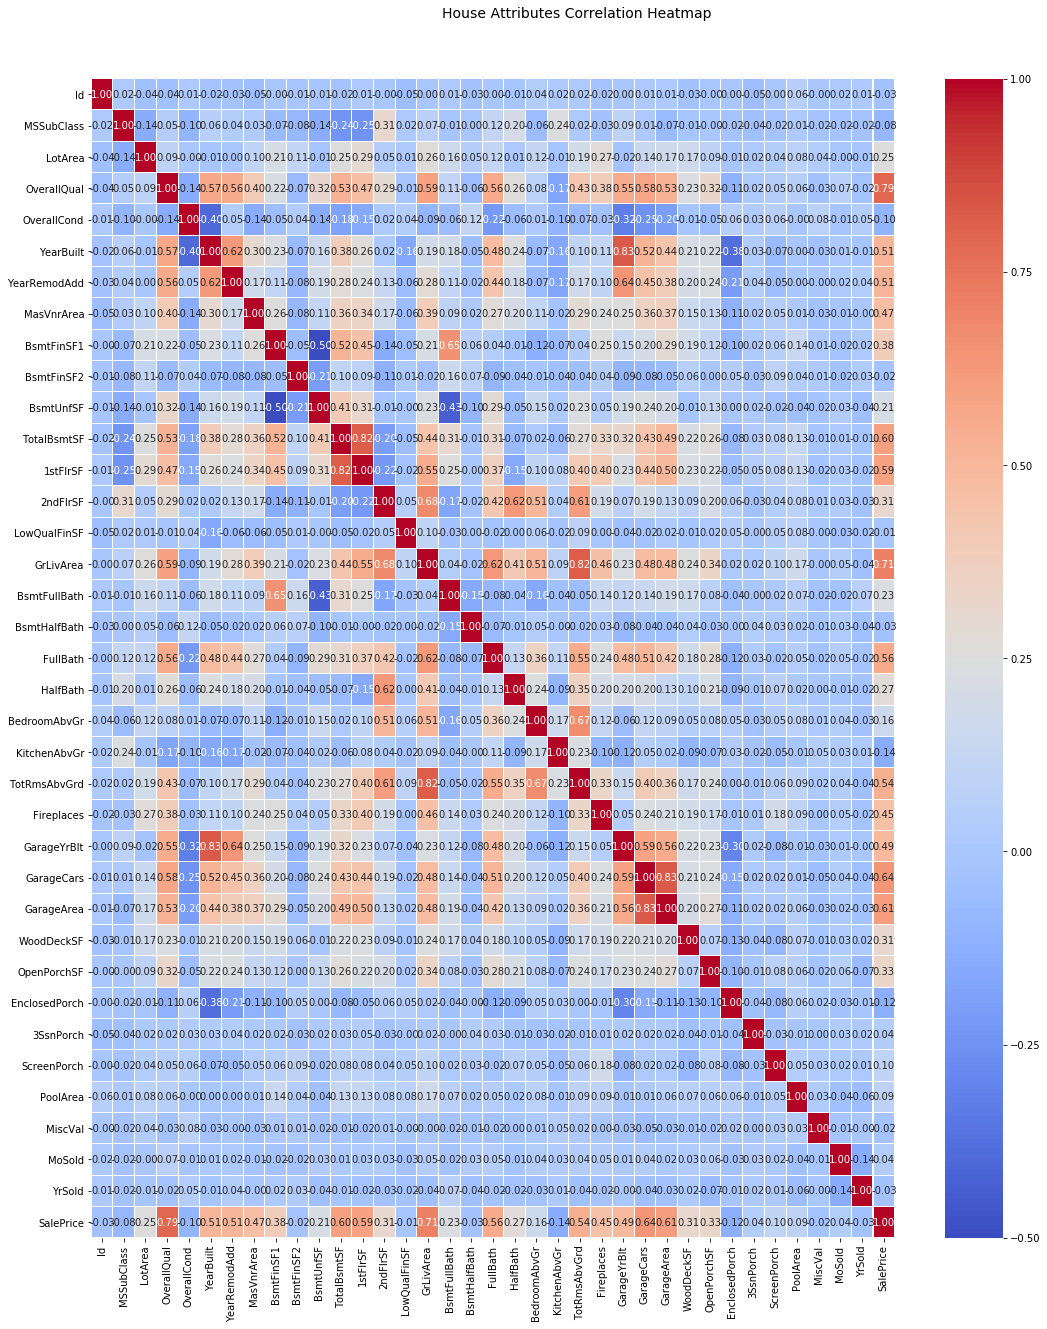

In [173]:
f, ax = plt.subplots(figsize=(18, 20))
corr = house.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('House Attributes Correlation Heatmap', fontsize=14)
plt.show()

Take the most correlated attribute here to conduct Multiple Linear Regression.

In [158]:
house = house[['OverallQual','GrLivArea','GarageCars','SalePrice']]

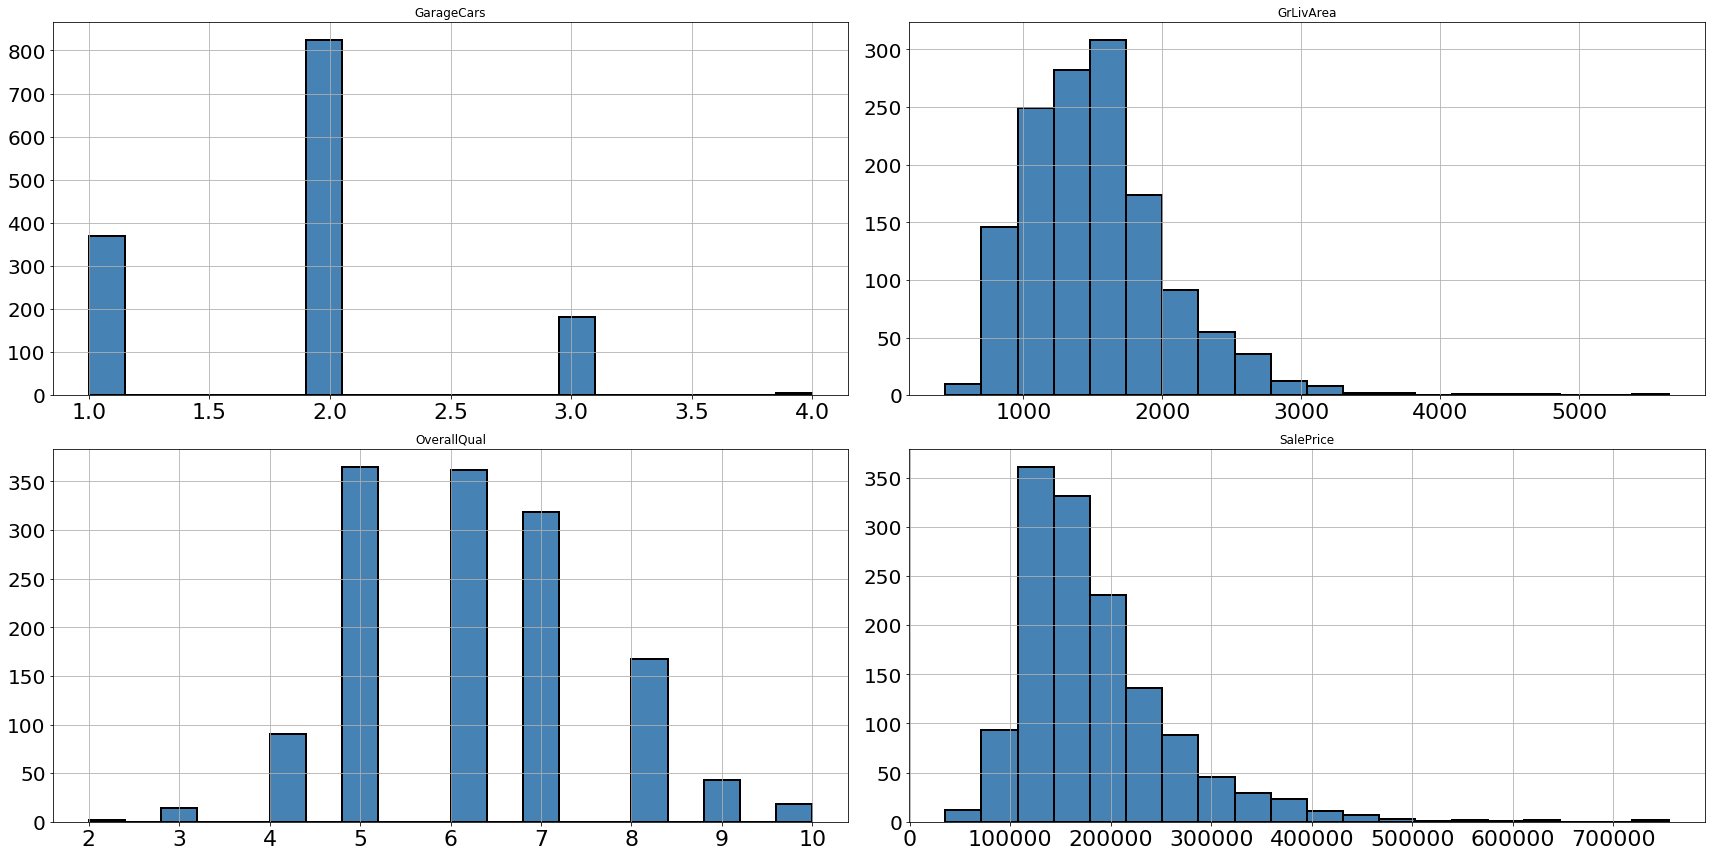

In [159]:
plt.rcParams['figure.figsize']=12,6
house.hist(bins=20, color='steelblue', edgecolor='black', linewidth=2.0,
           xlabelsize=22, ylabelsize=20, grid=True)
plt.tight_layout(rect=(0, 0, 2, 2))

plt.show()

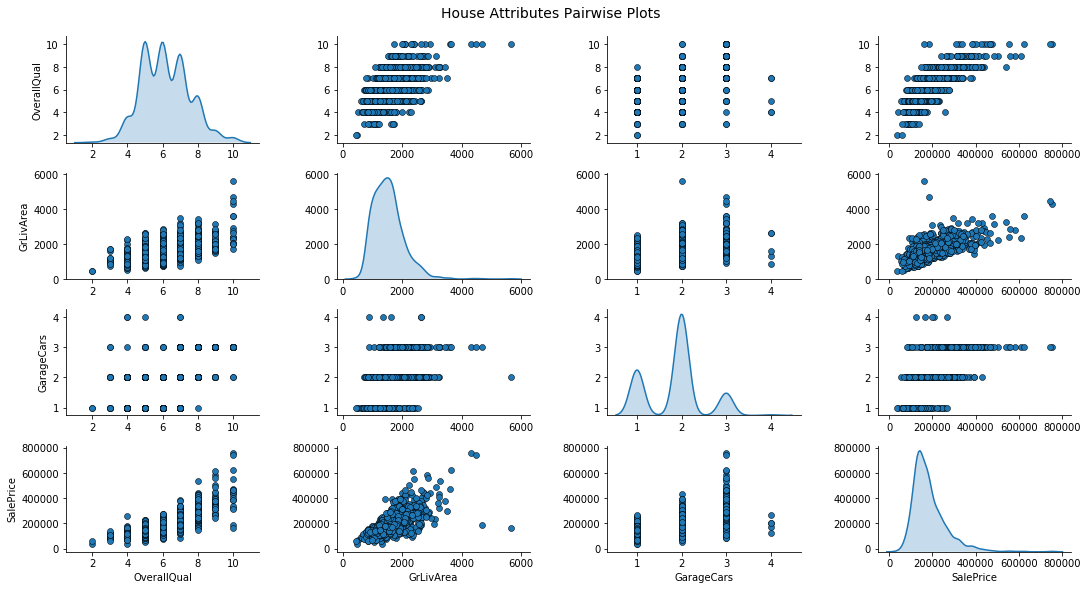

In [160]:
cols = ['OverallQual','GrLivArea','GarageCars','SalePrice']
pp = sns.pairplot(house[cols], size=2.08, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.4)
t = fig.suptitle('House Attributes Pairwise Plots', fontsize=14)
plt.show()

In [161]:
X = house[['OverallQual','GarageCars','GrLivArea']]
Y = house['SalePrice']

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [163]:
model = LinearRegression() 
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
print('Model Coefficient is:',model.coef_)
print('Model Intercept is:',model.intercept_)

Model Coefficient is: [ 29128.45005444  26157.87752869     46.42558882]
Model Intercept is: -116259.927727


### RMSE 

RMSE is one of the major way to assess the average error between predicted values & actual y values.
$$RMSE=\sqrt{\sum_i (\hat{y}_{i} -{y}_\text{test})^2},$$

In [185]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 38871.2167062



### R-squared $R^2$

A problem about RMSE is that the number you derive is not meaningful itself and it may vary depends on your datasets.

$R^2$ metric can handle the problem for your that only provide a accuracy ratio.  

In [186]:
y_pred = model.predict(X_test)
print('R2 Score of this model is:',r2_score(y_test,y_pred))

R2 Score of this model is: 0.751828485228


### Use Statistic OLS models

In [117]:
ols_Model = sm.OLS(y_train,X_train)
results = ols_Model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     5354.
Date:                Mon, 22 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:46:04   Log-Likelihood:                -11770.
No. Observations:                 965   AIC:                         2.355e+04
Df Residuals:                     962   BIC:                         2.356e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual  1.277e+04   1198.161     10.656      0.000    1.04e+04    1.51e+04
GarageCars   2.236e+04   3127.241      7.149      0.000    1.62e+04    2.85e+04
GrLivArea      44.7504      3.711     12.060      0.000      37.468      52.033
==============================================================================
Omnibus:                      486.319   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5975.810
Skew:                           2.000   Prob(JB):                         0.00
Kurtosis:                      14.516   Cond. No.                     3.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  OverallQual    12767.765628
GarageCars     22356.201247
GrLivArea         44.750439
dtype: float64
R2:  0.943494956692


In [119]:
X_train = sm.add_constant(X_train)
ols_Model = sm.OLS(y_train,X_train)
results = ols_Model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     861.2
Date:                Mon, 22 Oct 2018   Prob (F-statistic):          8.99e-272
Time:                        18:46:04   Log-Likelihood:                -11627.
No. Observations:                 965   AIC:                         2.326e+04
Df Residuals:                     961   BIC:                         2.328e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.163e+05   6385.778    -18.206      0.000   -1.29e+05   -1.04e+05
OverallQual  2.913e+04   1369.702     21.266      0.000    2.64e+04    3.18e+04
GarageCars   2.616e+04   2706.058      9.666      0.000    2.08e+04    3.15e+04
GrLivArea      46.4256      3.203     14.496      0.000      40.140      52.711
==============================================================================
Omnibus:                      252.511   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7003.074
Skew:                           0.554   Prob(JB):                         0.00
Kurtosis:                      16.151   Cond. No.                     7.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [177]:
print('Parameters: ', results.params)

Parameters:  const         -92543.785086
OverallQual    25906.464615
GarageCars     24484.359771
GrLivArea         45.443706
dtype: float64


            SalePrice = 29128.45 * OverallQual + 46.42 * GrLivArea + 26157.87* GarageCars:

## 4.  Model Assumptions

## Other Model Assumptions

### 1. Linearity of the Residuals

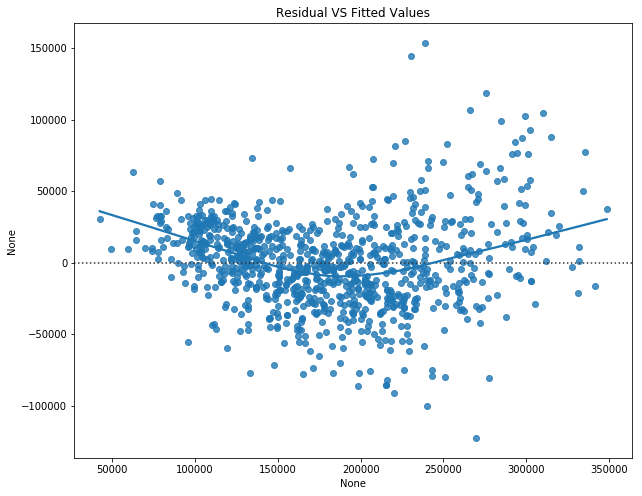

In [188]:
fitted = results.fittedvalues
residuals = results.resid
plt.rcParams['figure.figsize']=10,8
sns.residplot(x=fitted,y=residuals,lowess=True)
plt.title('Residual VS Fitted Values')
plt.show()

### 2. Autolinearity 

We use the Durbin-Watson statistcs to test the autolinearity of our models.

In [122]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     861.2
Date:                Mon, 22 Oct 2018   Prob (F-statistic):          8.99e-272
Time:                        18:46:05   Log-Likelihood:                -11627.
No. Observations:                 965   AIC:                         2.326e+04
Df Residuals:                     961   BIC:                         2.328e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.163e+05   6385.778    -18.206      0.000   -1.29e+05   -1.04e+05
OverallQual  2.913e+04   1369.702     21.266      0.000    2.64e+04    3.18e+04
GarageCars   2.616e+04   2706.058      9.666      0.000    2.08e+04    3.15e+04
GrLivArea      46.4256      3.203     14.496      0.000      40.140      52.711
==============================================================================
Omnibus:                      252.511   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7003.074
Skew:                           0.554   Prob(JB):                         0.00
Kurtosis:                      16.151   Cond. No.                     7.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Durbin-Watson statistics is 1.985 which is close to 2. We consider the model free of autolinearity.

### 3. Normality tests on residuals

We use QQ plot and Shapiro Wilk function

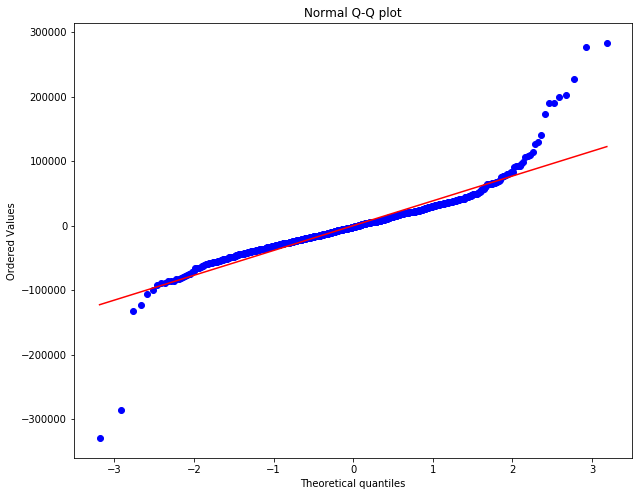

In [123]:
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [124]:
stats.kstest(residuals,'norm')

KstestResult(statistic=0.52742667998678761, pvalue=0.0)

### 4. Multicollinearity

In [125]:
variables = results.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[22.923954677183325,
 1.8642962631848916,
 1.5832208120085367,
 1.6046423637940008]

In [126]:
variance_inflation_factor?

### 5. Outlier & Leverages

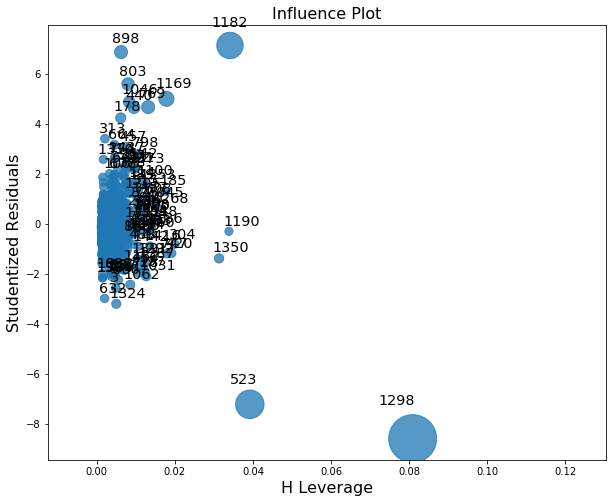

In [127]:
sm.graphics.influence_plot(results,criterion="cooks")

## Remove Outliers before fitting

### Conduct Data Cleaning & Model Fitting 

In [128]:
house2 = pd.read_csv('housePrice/train.csv')
garage_null = house2[['GarageCond','GarageYrBlt','GarageFinish','GarageQual']]
drop_column = house2.isnull().sum()[house2.isnull().sum().values>258].index
house2 = house2.drop(garage_null[garage_null['GarageCond'].isnull()].index,axis=0)
house2 = house2.drop(drop_column,axis=1)

In [129]:
house2=house2[['OverallQual','GarageCars','GrLivArea','SalePrice']]

### Use Z-Score to Remove Outliers

In [130]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(house2))
house2 = house2[(z<3).all(axis=1)]

In [131]:
X = house2[['OverallQual','GarageCars','GrLivArea']]
Y = house2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [132]:
model = LinearRegression() 
model.fit(X_train,y_train)
print('Model Coefficient is:',model.coef_)
print('Model Intercept is:',model.intercept_)

Model Coefficient is: [ 25906.46461501  24484.35977111     45.44370577]
Model Intercept is: -92543.7850864


In [134]:
X_train = sm.add_constant(X_train)
ols_Model = sm.OLS(y_train,X_train)
results = ols_Model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1071.
Date:                Mon, 22 Oct 2018   Prob (F-statistic):          7.10e-302
Time:                        18:46:07   Log-Likelihood:                -11057.
No. Observations:                 939   AIC:                         2.212e+04
Df Residuals:                     935   BIC:                         2.214e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.254e+04   5118.733    -18.079      0.000   -1.03e+05   -8.25e+04
OverallQual  2.591e+04   1083.560     23.909      0.000    2.38e+04     2.8e+04
GarageCars   2.448e+04   2122.060     11.538      0.000    2.03e+04    2.86e+04
GrLivArea      45.4437      2.762     16.452      0.000      40.023      50.864
==============================================================================
Omnibus:                       53.363   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.468
Skew:                           0.286   Prob(JB):                     3.83e-30
Kurtosis:                       4.771   Cond. No.                     7.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Reassessing the Model in the following ways 

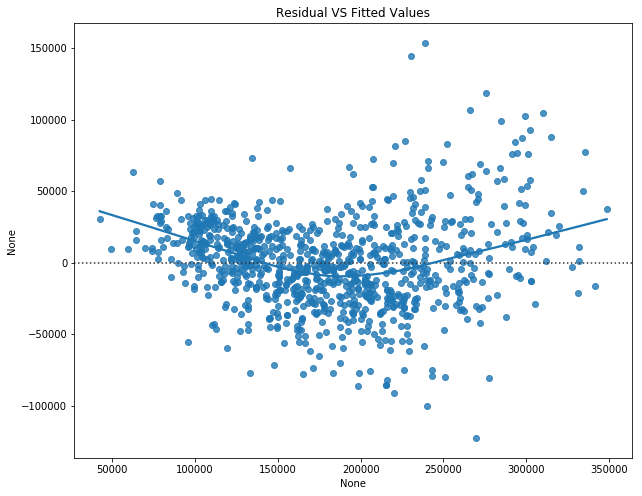

In [187]:
fitted = results.fittedvalues
residuals = results.resid
plt.rcParams['figure.figsize']=10,8
sns.residplot(x=fitted,y=residuals,lowess=True)
plt.title('Residual VS Fitted Values')
plt.show()

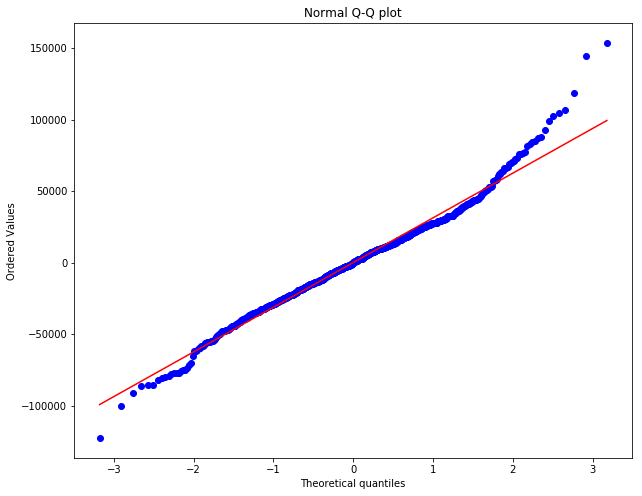

In [136]:
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [137]:
stats.kstest(residuals,'norm')

KstestResult(statistic=0.50053248136315232, pvalue=0.0)

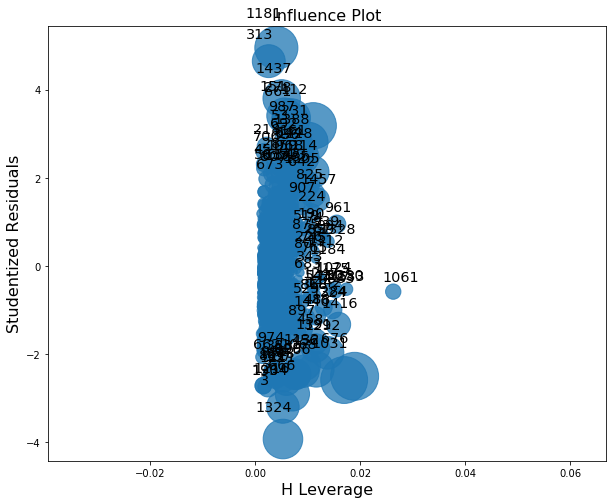

In [138]:
sm.graphics.influence_plot(results,criterion="cooks")

## Regularization

Regularizaiton is a way we use to constraint the size of coefficient to prevent the model from overfitting.

There are 2 ways of regularization: Ridge & Lasso. The difference between them lies in how we penalize the cost function.

Ridge regression (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

Lasso regression (or "L1 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

### Ridge Regression

In [139]:
ridge = Ridge(fit_intercept=True,alpha=1)

In [140]:
# remove the const column we add in the ols modeling
X_train.drop(['const'],axis=1,inplace=True)

In [141]:
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [142]:
y_pred = ridge.predict(X_test)

In [143]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print('rmse:',round(rmse,3))

rmse: 34249.797


In [144]:
r2 = r2_score(y_pred,y_test)
print('r2_score:',r2)

r2_score: 0.616992037901


### Lasso Regression

In [145]:
lasso = Lasso(fit_intercept=True,alpha=0.2)

In [146]:
lasso.fit(X_train,y_train)
y_predict = lasso.predict(X_test)

In [147]:
rmse = np.sqrt(mean_squared_error(y_predict,y_test))
print('rmse:',round(rmse,3))

rmse: 34252.774


In [148]:
r2 = r2_score(y_predict,y_test)
print('r2_score:',r2)

r2_score: 0.617245741592


Although r2_score dropped because regularization shrink the coefficients, but the model also remove the most import

## K-Fold Tests & Choice of Alpha

In [198]:
house2 = pd.read_csv('housePrice/train.csv')
garage_null = house2[['GarageCond','GarageYrBlt','GarageFinish','GarageQual']]
drop_column = house2.isnull().sum()[house2.isnull().sum().values>258].index
house2 = house2.drop(garage_null[garage_null['GarageCond'].isnull()].index,axis=0)
house2 = house2.drop(drop_column,axis=1)

In [235]:
X = house[['OverallQual','GarageCars','GrLivArea']]
y = house['SalePrice']
X = np.array(X.reset_index(drop=True))
y = np.array(y.reset_index(drop=True))

In [240]:
print('Lasso Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,100,20)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    lasso = Lasso(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    lasso.fit(X,y)
    y_pred = lasso.predict(X)
    err = y_pred-y    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(len(X), n_folds=5)
    xval_err = 0
    for train, test in kf:
        lasso.fit(X[train], y[train])
        y_pred = lasso.predict(X[test])
        err = y_pred - y[test]
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Lasso Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 40557.4110		 40917.9037
5.273	 40557.4122		 40917.9475
10.535	 40557.4156		 40918.0028
15.798	 40557.4213		 40918.0539
21.061	 40557.4293		 40918.1106
26.323	 40557.4401		 40918.1541
31.586	 40557.4527		 40918.2095
36.848	 40557.4676		 40918.2698
42.111	 40557.4848		 40918.3324
47.374	 40557.5042		 40918.4309
52.636	 40557.5259		 40918.4888
57.899	 40557.5499		 40918.5584
63.162	 40557.5761		 40918.6396
68.424	 40557.6046		 40918.7138
73.687	 40557.6354		 40918.7904
78.949	 40557.6684		 40918.8692
84.212	 40557.7037		 40918.9503
89.475	 40557.7412		 40919.0338
94.737	 40557.7811		 40919.1195
100.000	 40557.8231		 40919.2076


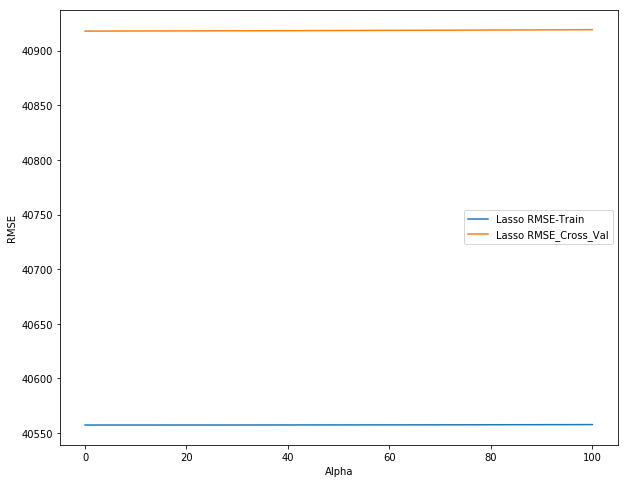

In [244]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
plt.legend( ('Lasso RMSE-Train', 'Lasso RMSE_Cross_Val') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

Seems that for lasso regression, the difference of alpha is not significant which means that on L2 level, the overfitting isn't a big problem.

In [246]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,100,20)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    ridge.fit(X,y)
    y_pred = ridge.predict(X)
    err = y_pred-y    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(len(X), n_folds=5)
    xval_err = 0
    for train, test in kf:
        ridge.fit(X[train], y[train])
        y_pred = ridge.predict(X[test])
        err = y_pred - y[test]
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 40557.4110		 40917.9052
5.273	 40557.7877		 40919.2613
10.535	 40558.8845		 40921.7180
15.798	 40560.6584		 40925.1925
21.061	 40563.0697		 40929.6105
26.323	 40566.0819		 40934.9046
31.586	 40569.6615		 40941.0143
36.848	 40573.7773		 40947.8845
42.111	 40578.4005		 40955.4651
47.374	 40583.5044		 40963.7106
52.636	 40589.0642		 40972.5795
57.899	 40595.0571		 40982.0339
63.162	 40601.4615		 40992.0388
68.424	 40608.2575		 41002.5625
73.687	 40615.4265		 41013.5755
78.949	 40622.9511		 41025.0508
84.212	 40630.8151		 41036.9633
89.475	 40639.0033		 41049.2899
94.737	 40647.5013		 41062.0093
100.000	 40656.2958		 41075.1014


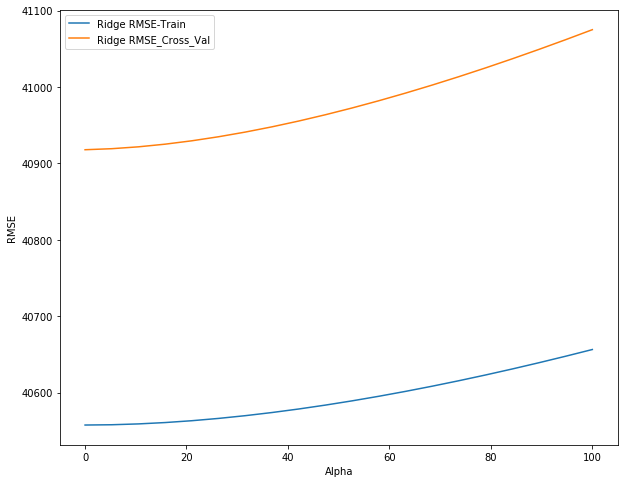

In [247]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
plt.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()